In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['text.usetex'] = False
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
data = np.loadtxt('Raw Data_3.csv', skiprows=2)

(200.0, 210.0)

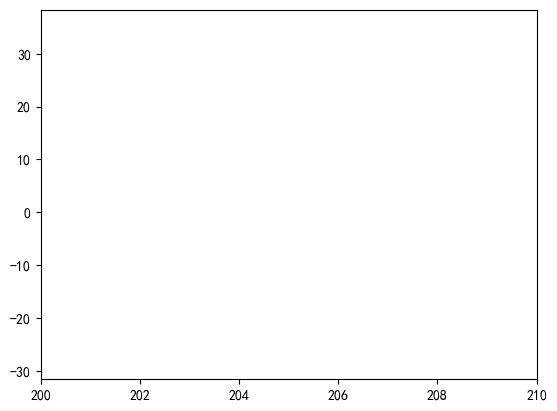

In [2]:
fig, ax = plt.subplots(1, 1)
ax.plot(data[:, 0], data[:, 1])
ax.plot(data[:, 0], data[:, 2])
ax.plot(data[:, 0], data[:, 3])
ax.set_xlim(200, 210)
# ax.set_xlim(120, 130)
# ax.set_xlim(130, 135)
# ax.set_xlim(140, 150)
# ax.set_xlim(235, 240)
# ax.set_xlim(200, 210)
# ax.set_xlim(208, 211)

peak indices: [0, 32, 50, 71, 92, 114, 132, 134, 136, 160, 164, 167, 178, 181, 186, 190, 193, 195, 197]
peak omega: 35.10758972 -35.10974121
peak omega: -35.10974121 34.08502579
peak omega: 34.08502579 -33.86575317
peak omega: -33.86575317 32.61080933
targets: 24.82449968371145 -24.826651173711454
targets: -24.976402194161572 23.951686774161573
targets: 24.133864604762092 -23.914591984762087
targets: -24.13048598686067 22.875542146860674
[0.06344605 0.13175027 0.0660765  0.13832748 0.06765482 0.14999821
 0.06977125]
[130.38159202188302, 130.44503807173186, 130.57678834577396, 130.6428648410988, 130.78119232519208, 130.84884714030147, 130.99884534803724, 131.06861659317315]
[ 24.82449968 -24.82665117 -24.97640219  23.95168677  24.1338646
 -23.91459198 -24.13048599  22.87554215]


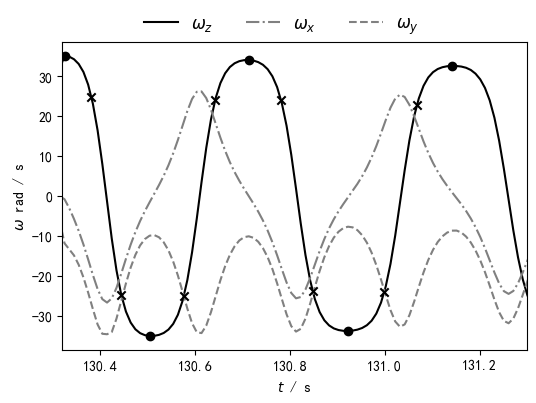

In [3]:
import scipy
data = np.loadtxt('Raw Data.csv', skiprows=2)
lt, rt = 130, 135
lindex = min([d for d in range(data[:, 0].shape[0]) if data[d, 0] > 130])
rindex = max([d for d in range(data[:, 0].shape[0]) if data[d, 0] < 132])
time = t = data[lindex:rindex, 0]
omega_z = data[lindex:rindex, 1]
omega_y = data[lindex:rindex, 2]
omega_x = data[lindex:rindex, 3]

def find_peaks(arr):
    res = []
    for i in range(arr.shape[0] - 1):
        if (arr[i] > arr[i - 1] and arr[i + 1] < arr[i]) or (arr[i] < arr[i - 1] and arr[i + 1] > arr[i]):
            res.append(i)
    return res

peaks = find_peaks(omega_z)
print('peak indices:', peaks)
peaks_index = [32, 50, 71, 92, 114]


fig, ax = plt.subplots(1, 1)
ax.plot(t, omega_z, ls='-', label='$\omega_z$', c='0')
ax.plot(t, omega_x, ls='-.', label='$\omega_x$', c='0.5')
ax.plot(t, omega_y, ls='--', label='$\omega_y$', c='0.5')

ax.scatter(t[peaks[:6]], omega_z[peaks[:6]], marker='o', c='0')
c = ['orange', 'steelblue', 'darkgreen', 'purple']
for i in range(len(peaks_index[:-1])):
    p1 = omega_z[peaks_index[i]]
    p2 = omega_z[peaks_index[i + 1]]
    print('peak omega:', p1, p2)
    if i == 0:
        # ax.plot(ax.get_xlim(), [(p1 + p2) / 2 + (p1 - p2) / 2 / np.sqrt(2)] * 2, ls=':', alpha=1, c='0')
        # ax.plot(ax.get_xlim(), [(p1 + p2) / 2 - (p1 - p2) / 2 / np.sqrt(2)] * 2, ls=':', alpha=1, c='0')
        pass
    ax.set_xlim(130, 131.5)


def find_root(l, r, target):
    a = omega_z
    t = target
    assert (a[l] - t) * (a[r]-t) , 'bad init bracket'
    while np.abs(l - r) > 1:
        m = int((l + r) / 2)
        if (a[l] - t) * (a[m] - t) > 0:
            l = m
        else:
            r = m
    res = (time[l] * a[r] - time[r] * a[l] + (time[r] - time[l]) * t) / (a[r] - a[l])
    return res

def get_target(h, l):
    mid = (h + l) / 2
    quater = (h - l) / 2 / np.sqrt(2)
    return mid + quater, mid - quater

roots = []
for i in range(len(peaks_index[:-1])):
    this_p = peaks_index[i]
    next_p = peaks_index[i + 1]
    target_h, target_l = get_target(omega_z[this_p], omega_z[next_p])
    print('targets:', target_h, target_l)
    roots.append(find_root(this_p, next_p, target_h))
    roots.append(find_root(this_p, next_p, target_l))
    ax.scatter(roots[-2:], scipy.interpolate.interp1d(t, omega_z)(roots[-2:]), c='0', marker='x', zorder=10)
print(np.array(roots[1:]) - np.array(roots[:-1]))

print(roots)
print(scipy.interpolate.interp1d(t, omega_z)(roots))
ax.legend( loc='lower right',bbox_to_anchor=(0.8, 0.97), frameon=False, fontsize=12, ncol=3)
ax.set_xlabel('$t$'+' / s')
ax.set_ylabel('$\omega$' + ' rad / s')
ax.set_xlim(130.32, 131.3)
fig.set_size_inches(6, 4)
fig.savefig('output_g.png')

peak indices: [1, 30, 64]
peak omega: 22.49661255 -22.39225578
peak omega: -22.39225578 21.79081535
[[22.49661255, -22.39225578], [-22.39225578, 21.79081535]]
[0.1006891649653312, 0.10435172495579081]


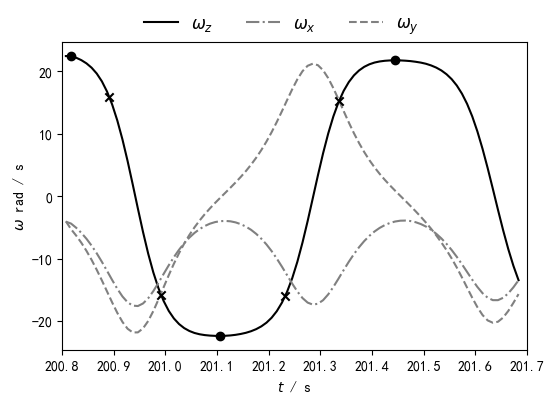

In [8]:
import scipy

lt, rt = 200.8, 201.7
lindex = min([d for d in range(data[:, 0].shape[0]) if data[d, 0] > lt])
rindex = max([d for d in range(data[:, 0].shape[0]) if data[d, 0] < rt])
time = t = data[lindex:rindex:, 0]
omega_z = data[lindex:rindex, 1]
omega_y = data[lindex:rindex, 2]
omega_x = data[lindex:rindex, 3]

def find_peaks(arr):
    res = []
    for i in range(arr.shape[0] - 1):
        if ((arr[i] > arr[i - 1] and arr[i + 1] < arr[i]) or (arr[i] < arr[i - 1] and arr[i + 1] > arr[i])) and np.abs(arr[i]) > 10:
            res.append(i)
    return res

peaks = find_peaks(omega_z)
print('peak indices:', peaks)

# manually select reasonable peaks
peaks_index = [1, 30, 64]
peak_omega = []
def T_sqrt2(peaks_index):
    fig, ax = plt.subplots(1, 1)
    ax.plot(t, omega_z, label='$\omega_z$', ls='-', c='0.0')
    ax.plot(t, omega_x, label='$\omega_x$', ls='-.', c='0.5')
    ax.plot(t, omega_y, label='$\omega_y$', ls='--', c='0.5')
    ax.scatter(t[peaks], omega_z[peaks], marker='o', c='0.0')
    c = ['orange', 'steelblue', 'darkgreen', 'purple', 'pink']
    for i in range(len(peaks_index[:-1])):
        p1 = omega_z[peaks_index[i]]
        p2 = omega_z[peaks_index[i + 1]]
        print('peak omega:', p1, p2)
        peak_omega.append([p1, p2])
        # ax.plot(ax.get_xlim(), [(p1 + p2) / 2 + (p1 - p2) / 2 / np.sqrt(2)] * 2, ls=':', alpha=1, label=f'{i}-th flip', c=c[i])
        # ax.plot(ax.get_xlim(), [(p1 + p2) / 2 - (p1 - p2) / 2 / np.sqrt(2)] * 2, ls=':', alpha=1, c=c[i])
        ax.set_xlim(lt, rt)
        
    ax.legend()

    def find_root(l, r, target):
        a = omega_z
        t = target
        assert (a[l] - t) * (a[r]-t) , 'bad init bracket'
        while np.abs(l - r) > 1:
            m = int((l + r) / 2)
            if (a[l] - t) * (a[m] - t) > 0:
                l = m
            else:
                r = m
        return (time[r] + time[l] * (a[r] - t) / (t - a[l])) / (1 + (a[r] - t) / (t - a[l]))

    def get_target(h, l):
        mid = (h + l) / 2
        quater = (h - l) / 2 / np.sqrt(2)
        return mid + quater, mid - quater

    roots = []
    for i in range(len(peaks_index[:-1])):
        this_p = peaks_index[i]
        next_p = peaks_index[i + 1]
        target_h, target_l = get_target(omega_z[this_p], omega_z[next_p])
        roots.append(find_root(this_p, next_p, target_h))
        roots.append(find_root(this_p, next_p, target_l))
        ax.scatter(roots[-2:], scipy.interpolate.CubicSpline(t, omega_z)(roots[-2:]), c='0.0', marker='x', zorder=10)

    print(peak_omega)
    print([x for x in list(np.array(roots[1:]) - np.array(roots[:-1])) if x < 0.11])
    return fig, ax

fig, ax = T_sqrt2(peaks_index)

ax.legend( loc='lower right',bbox_to_anchor=(0.8, 0.97), frameon=False, fontsize=12, ncol=3)
ax.set_xlabel('$t$'+' / s')
ax.set_ylabel('$\omega$' + ' rad / s')
fig.set_size_inches(6, 4)
fig.savefig('y_flip_g.png')

result: flipping time : [0.06589789, 0.06767296, 0.0691616, 0.07159774], [0.07696734, 0.0812484, 0.08499985]
omega before and after flipping: [35.10758972 -35.10974121], [-35.10974121 34.08502579], [34.08502579 -33.86575317], [-33.86575317 32.61080933]; [[30.29138184, -30.07899094], [-30.07899094, 29.22068787], [29.22068787, -28.05976868]]

peak omega: 30.9316597 -30.59794617
peak omega: -30.59794617 29.54295158
peak omega: 29.54295158 -28.30286026
[0.07694694 0.21023313 0.0794711  0.18845966 0.082325  ]

peak indices: [433, 463, 492, 521, 543, 546]
peak omega: 28.05769348 -27.07497215
peak omega: -27.07497215 26.22177124
peak omega: 26.22177124 -25.32684135
[0.08735174 0.21074561 0.08943301 0.19903742 0.09235618]


intercept: 0.0003974603786383035 slope: 2.3158281506971257 stderr of slope: 0.03861827810111466 r 0.9964044174166016
analytical slope: 2.30717


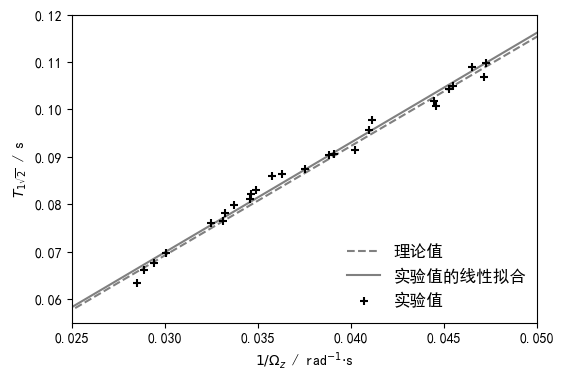

In [5]:


omega = [[35.10758972, -35.10974121], [-35.10974121, 34.08502579], [34.08502579, -33.86575317], [-33.86575317, 32.61080933]] + \
            [[30.29138184, -30.07899094], [-30.07899094, 29.22068787], [29.22068787, -28.05976868]] + \
            [[30.9316597, -30.59794617], [-30.59794617, 29.54295158], [29.54295158, -28.30286026]] + \
            [[ 28.05769348, -27.07497215], [-27.07497215, 26.22177124], [26.22177124, -25.32684135]] + \
            [[22.49661255, -22.39225578], [-22.39225578, 21.79081535]] +\
            [[29.2616272, -28.48443222], [-28.48443222, 27.41211128]] +\
            [[-21.59933472, 20.79152489]] + [[21.12207985, -21.19717026]] + \
            [[19.60765266, -18.95135689]] + \
            [[15.72865772, -15.47888947]] + \
            [[22.57506371, -22.39174843], [-22.39174843, 21.5946846]] +\
            [[24.50753403, -24.30056]] + [[25.9724617, -25.22288704], [-25.22288704, 24.49020004]] + [[24.69920349, -23.88905907]] + [[21.99112511, -20.98981667]]


omega = np.array([np.abs(t).sum() / 2 for t in omega])

flip_time = [0.06344605, 0.0660765, 0.06765482, 0.06977125] + [0.07646309898905201, 0.0798410423634266, 0.08299590304136473] + [0.0761420735599927, 0.0780764906325544, 0.08119437715970435] \
 + [0.08630174920583045, 0.0875399002431152, 0.09030990935450234]\
 + [0.1006891649653312, 0.10435172495579081] + [0.08226457522826536, 0.08599136633418425] + \
    [ 0.10684056, 0.1099007] + [0.12297479] + [0.14902296] + [0.10176305899811666, 0.10488900214176056] + [0.09575510834612544] + [0.09053138224680168, 0.09144148870607438] + [0.09770892422868371] + [0.10896590958077468]
fig, ax = plt.subplots(1, 1)

x = np.linspace(0 , 0.1, 10)
ax.plot(x, 2.30717 * x, ls='--', label='理论值', c='0.5')
linear_fit = scipy.stats.linregress(1 / omega, flip_time)
ax.plot(x, x * linear_fit.slope + linear_fit.intercept, label='实验值的线性拟合', c='0.5')

ax.set_xlabel('$1/ \Omega_z$'+' / rad'+'$^{-1}$'+ '$\cdot$' + 's')
ax.set_ylabel('$T_{1\sqrt{2}}$'+' / s')

# ax.scatter(1 / omega[0: 4], flip_time[0: 4], marker='o', label='exp 1')
# ax.scatter(1 / omega[4: 7], flip_time[4: 7], marker='o', label='exp 2')
# ax.scatter(1 / omega[7: 10], flip_time[7: 10], marker='o', label='exp 3')
# ax.scatter(1 / omega[10: 13], flip_time[10: 13], marker='o')
# ax.scatter(1 / omega[13: 15], flip_time[13: 15], marker='o')
# ax.scatter(1 / omega[15: 17], flip_time[15: 17], marker='o')
# ax.scatter(1 / omega[17: 19], flip_time[17: 19], marker='o')
# ax.scatter(1 / omega[19], flip_time[19], marker='o')
# ax.scatter(1 / omega[20], flip_time[20], marker='o')
# ax.scatter(1 / omega[21], flip_time[21], marker='o')
# ax.scatter(1 / omega[22], flip_time[22], marker='o')
ax.scatter(1 / omega[:], flip_time[:], marker='+', zorder=10, label='实验值', c='0.0') 

ax.legend()
ax.set_xlim(0.025, 0.05)
ax.set_ylim(0.055, 0.12)
print('intercept:', linear_fit.intercept, 'slope:', linear_fit.slope, 'stderr of slope:', linear_fit.stderr, 'r', linear_fit.rvalue)
print('analytical slope:', 2.30717)
ax.legend( loc='lower right',bbox_to_anchor=(1.01, 0), frameon=False, fontsize=12)

fig.set_size_inches(6, 4)
fig.savefig('fit.png')

